In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import norm
from scipy import stats

In [101]:
#train_data_pri = pd.read_csv('./data/private_train.csv')
train_data_pri = pd.read_csv('private_train_2.csv')
test_data_pri = pd.read_csv('./data/private_test.csv')
train_data_pri_p = pd.read_csv('private_train_2.csv')

In [102]:
train_data_pri = train_data_pri[train_data_pri.month.str.contains('2017')]

In [103]:
train_data_pri = train_data_pri.drop(['index'],axis=1)
test_data_pri = test_data_pri.drop(['index'],axis=1)
print train_data_pri.shape
print train_data_pri_p.shape
print test_data_pri.shape
print "List of Columns:\n", ", ".join(train_data_pri.columns), "\n\n"
print "List of Columns:\n", ", ".join(test_data_pri.columns), "\n\n"

(19851, 20)
(457288, 21)
(4033, 19)
List of Columns:
project_name, address, floor_area_sqm, type_of_land, price, contract_date, property_type, tenure, completion_date, type_of_sale, postal_district, postal_sector, postal_code, region, area, month, latitude, longitude, floor_num, unit_num 


List of Columns:
project_name, address, floor_area_sqm, type_of_land, contract_date, property_type, tenure, completion_date, type_of_sale, postal_district, postal_sector, postal_code, region, area, month, latitude, longitude, floor_num, unit_num 




In [104]:
test_data_pri[test_data_pri['completion_date'] == 'Uncompleted'].completion_date.value_counts()

Series([], Name: completion_date, dtype: int64)

In [105]:
train_data_pri[train_data_pri['completion_date'] == 'Uncompleted'].completion_date.value_counts()

Uncompleted    9938
Name: completion_date, dtype: int64

In [106]:
test_data_pri.completion_date.unique()

array(['2014', '1995', '1979', '2015', '2016', '1992', '1998', '1986',
       '2011', '2010', '2000', '2012', '2001', '1999', '1968', '2004',
       '2006', 'Unknown', '2005', '2009', '1975', '2013', '1996', '1997',
       '1991', '1994', '2002', '1982', '2008', '2007', '1987', '1978',
       '1983', '1984', '1972', '1990', '1993', '1971', '2003', '1969',
       '1985', '1989', '2017', '1980', '1976', '1956', '1988', '1967',
       '1958', '1957', '1955', '1977', '1960', '1966', '1965', '1961',
       '1974', '1953', '1941', '1970', '1981', '1950', '1963', '1962'], dtype=object)

In [107]:
train_data_pri.completion_date.unique()

array(['1997', '2014', 'Uncompleted', '2017', '2015', '2000', '2016',
       'Unknown', '2009', '1999', '1992', '2011', '2012', '2005', '2004',
       '2001', '1980', '1995', '2003', '1998', '2007', '2006', '1984',
       '1978', '2002', '2013', '1981', '2008', '1979', '1986', '1996',
       '1987', '1985', '1994', '1993', '1966', '1977', '2010', '1989',
       '1988', '1983', '1972', '1990', '1969', '1976', '1982', '1975',
       '1968', '1991', '1971', '1962', '1967', '1960', '1956', '1974',
       '1963', '1932', '1973', '1955', '1964', '1929', '1965', '1951',
       '1970', '1958', '1954', '1961', '1953'], dtype=object)

In [108]:
test_data_pri.type_of_land.unique()

array(['Strata', 'Land'], dtype=object)

In [109]:
train_data_pri.type_of_land.unique()

array(['Strata', 'Land'], dtype=object)

In [110]:
test_data_pri[test_data_pri['type_of_land'] == 'Unknown'].type_of_land.value_counts()

Series([], Name: type_of_land, dtype: int64)

In [111]:
train_data_pri[train_data_pri['type_of_land'] == 'Unknown'].type_of_land.value_counts()

Series([], Name: type_of_land, dtype: int64)

In [112]:
train_data_pri.contract_date.unique()

array(['31-Jan-17', '30-Jan-17', '29-Jan-17', '28-Jan-17', '27-Jan-17',
       '26-Jan-17', '25-Jan-17', '24-Jan-17', '23-Jan-17', '22-Jan-17',
       '21-Jan-17', '20-Jan-17', '19-Jan-17', '18-Jan-17', '17-Jan-17',
       '16-Jan-17', '15-Jan-17', '14-Jan-17', '13-Jan-17', '12-Jan-17',
       '11-Jan-17', '10-Jan-17', '9-Jan-17', '8-Jan-17', '7-Jan-17',
       '6-Jan-17', '5-Jan-17', '4-Jan-17', '3-Jan-17', '2-Jan-17',
       '1-Jan-17', '28-Feb-17', '27-Feb-17', '26-Feb-17', '25-Feb-17',
       '24-Feb-17', '23-Feb-17', '22-Feb-17', '21-Feb-17', '20-Feb-17',
       '19-Feb-17', '18-Feb-17', '17-Feb-17', '16-Feb-17', '15-Feb-17',
       '14-Feb-17', '13-Feb-17', '12-Feb-17', '11-Feb-17', '10-Feb-17',
       '9-Feb-17', '8-Feb-17', '7-Feb-17', '6-Feb-17', '5-Feb-17',
       '4-Feb-17', '3-Feb-17', '2-Feb-17', '1-Feb-17', '31-Mar-17',
       '30-Mar-17', '29-Mar-17', '28-Mar-17', '27-Mar-17', '26-Mar-17',
       '25-Mar-17', '24-Mar-17', '23-Mar-17', '22-Mar-17', '21-Mar-17',
       '20

In [113]:
test_data_pri.contract_date.unique()

array(['29-Sep-2017', '28-Sep-2017', '27-Sep-2017', '26-Sep-2017',
       '25-Sep-2017', '22-Sep-2017', '21-Sep-2017', '20-Sep-2017',
       '19-Sep-2017', '18-Sep-2017', '15-Sep-2017', '14-Sep-2017',
       '13-Sep-2017', '12-Sep-2017', '11-Sep-2017', '8-Sep-2017',
       '7-Sep-2017', '6-Sep-2017', '5-Sep-2017', '4-Sep-2017',
       '08-SEP-2017', '07-SEP-2017', '06-SEP-2017', '05-SEP-2017',
       '04-SEP-2017', '22-SEP-2017', '21-SEP-2017', '20-SEP-2017',
       '19-SEP-2017', '18-SEP-2017', '15-SEP-2017', '14-SEP-2017',
       '13-SEP-2017', '12-SEP-2017', '11-SEP-2017', '09-SEP-2017',
       '05-OCT-2017', '04-OCT-2017', '03-OCT-2017', '02-OCT-2017',
       '29-SEP-2017', '28-SEP-2017', '27-SEP-2017', '26-SEP-2017',
       '25-SEP-2017', '23-SEP-2017', '19-OCT-2017', '18-OCT-2017',
       '17-OCT-2017', '16-OCT-2017', '13-OCT-2017', '12-OCT-2017',
       '11-OCT-2017', '10-OCT-2017', '09-OCT-2017', '06-OCT-2017',
       '01-NOV-2017', '31-OCT-2017', '30-OCT-2017', '29-OCT-2017',


In [114]:
train_data_pri.month.unique()

array(['2017-1', '2017-2', '2017-3', '2017-4', '2017-5', '2017-6',
       '2017-7', '2017-8'], dtype=object)

In [115]:
test_data_pri.month.unique()

array(['2017-9', '2017-10', '2017-11'], dtype=object)

In [116]:
train_data_pri.property_type.unique()

array(['Condominium', 'Apartment', 'Executive Condominium',
       'Terrace House', 'Semi-Detached House', 'Detached House'], dtype=object)

In [117]:
test_data_pri.property_type.unique()

array(['Condominium', 'Apartment', 'Terrace House', 'Semi-Detached House',
       'Detached House', 'Executive Condominium'], dtype=object)

In [118]:
train_data_pri.tenure.unique()

array(['Freehold', '99 Yrs From 23/08/2010', '99 Yrs From 07/05/2013',
       '99 Yrs From 04/06/2012', '99 Yrs From 02/06/2014',
       '99 Yrs From 22/09/1997', '99 Yrs From 12/08/2013',
       '99 Years Leasehold', '103 Yrs From 01/12/1985',
       '99 Yrs From 03/03/2014', '99 Yrs From 21/01/2013',
       '99 Yrs From 25/05/2015', '99 Yrs From 28/04/2014',
       '99 Yrs From 10/05/2010', '99 Yrs From 03/08/2006',
       '99 Yrs From 21/06/2006', '99 Yrs From 27/04/2015',
       '99 Yrs From 12/08/1996', '99 Yrs From 30/10/2013',
       '99 Yrs From 28/09/2015', '99 Yrs From 11/11/2015',
       '99 Yrs From 17/03/2008', '99 Yrs From 06/05/2008',
       '99 Yrs From 08/04/2010', '99 Yrs From 10/09/2007',
       '999 Yrs From 01/01/1954', '99 Yrs From 09/01/2015',
       '99 Yrs From 29/07/2014', '99 Yrs From 05/05/2015',
       '99 Yrs From 16/10/2013', '99 Yrs From 12/01/2015',
       '99 Yrs From 05/02/2016', '99 Yrs From 10/09/2012',
       '99 Yrs From 25/08/2014', '99 Yrs From 

In [119]:
test_data_pri.tenure.unique()

array(['99 Yrs From 08/04/2010', 'Freehold', '99 Yrs From 20/10/2010',
       '999 Yrs From 21/06/1877', '99 Yrs From 01/03/1991',
       '999 Yrs From 01/01/1954', '99 Yrs From 07/12/2011',
       '99 Yrs From 26/06/1996', '99 Yrs From 17/03/1982',
       '99 Yrs From 10/09/2007', '99 Yrs From 12/08/1996',
       '99 Yrs From 24/06/1995', '99 Yrs From 24/04/1996',
       '99 Yrs From 26/02/2007', '99 Yrs From 31/12/2007',
       '99 Yrs From 16/08/1999', '99 Yrs From 15/03/2006',
       '99 Yrs From 20/01/2004', '99 Yrs From 07/01/2008',
       '99 Yrs From 10/08/2011', '999 Yrs From 01/05/1874',
       '99 Yrs From 07/06/2011', '99 Yrs From 06/01/2010',
       '99 Yrs From 08/03/1982', '99 Yrs From 16/06/2010',
       '99 Yrs From 20/10/1993', '99 Yrs From 17/03/1997',
       '99 Yrs From 11/07/2011', '103 Yrs From 18/08/2009',
       '99 Yrs From 11/12/2007', '99 Yrs From 30/05/2011',
       '999 Yrs From 01/01/1955', '99 Yrs From 16/02/1998',
       '99 Yrs From 21/06/2001', '99 Yr

In [120]:
train_data_pri.type_of_sale.unique()

array(['Resale', 'New Sale', 'Sub Sale'], dtype=object)

In [121]:
test_data_pri.type_of_sale.unique()

array(['Resale'], dtype=object)

In [122]:
train_data_pri.groupby(['type_of_sale'])['price'].count()

type_of_sale
New Sale    11065
Resale       8546
Sub Sale      240
Name: price, dtype: int64

In [123]:
train_data_pri.postal_district.unique()

array([12, 19,  3, 23,  9, 25, 11, 10, 22, 16, 27, 15,  5, 18,  8, 20, 21,
       14,  4,  2, 28,  1, 13, 17, 26,  7])

In [124]:
train_data_pri.postal_sector.unique()

array([32, 54, 14, 66, 22, 68, 73, 30, 25, 64, 53, 46, 76, 23, 28, 61, 82,
       42, 12, 51, 20, 26, 24, 57, 55, 59, 38, 52,  9, 41, 65, 58, 56, 16,
       43, 45, 44, 27,  8, 15, 67, 47, 80,  6, 21, 39, 29,  7, 13, 31, 36,
       79, 75, 34, 11, 60, 50, 35,  1, 78, 19, 48, 33, 10,  5, 63, 40, 18,
       77, 49])

In [125]:
train_data_pri.postal_code.unique()

array([329023, 544777, 149740, ..., 266178, 266180, 557320])

In [126]:
train_data_pri.region.unique()

array(['Central Region', 'North East Region', 'West Region',
       'North Region', 'East Region'], dtype=object)

In [127]:
train_data_pri.area.unique()

array(['Kallang', 'Hougang', 'Queenstown', 'Bukit Batok', 'Newton',
       'Choa Chu Kang', 'Woodlands', 'Novena', 'Tanglin', 'Jurong West',
       'Bedok', 'Sembawang', 'River Valley', 'Bukit Timah', 'Yishun',
       'Punggol', 'Geylang', 'Clementi', 'Pasir Ris', 'Bishan',
       'Serangoon', 'Sengkang', 'Tampines', 'Bukit Merah', 'Ang Mo Kio',
       'Rochor', 'Marine Parade', 'Bukit Panjang', 'Singapore River',
       'Toa Payoh', 'Downtown Core', 'Museum', 'Outram', 'Jurong East',
       'Orchard', 'Sungei Kadut', 'Mandai', 'Southern Islands', 'Changi  '], dtype=object)

In [128]:
test_data_pri.area.unique()

array(['Bukit Timah', 'Kallang', 'Serangoon', 'Pasir Ris', 'Tanglin',
       'Yishun', 'Hougang', 'Woodlands', 'Bedok', 'Bishan', 'Queenstown',
       'Geylang', 'Bukit Merah', 'River Valley', 'Novena', 'Newton',
       'Punggol', 'Singapore River', 'Tampines', 'Marine Parade',
       'Ang Mo Kio', 'Choa Chu Kang', 'Bukit Batok', 'Museum', 'Sembawang',
       'Downtown Core', 'Jurong East', 'Toa Payoh', 'Rochor',
       'Southern Islands', 'Bukit Panjang', 'Sengkang', 'Clementi',
       'Jurong West', 'Outram', 'Orchard', 'Mandai', 'Changi  '], dtype=object)

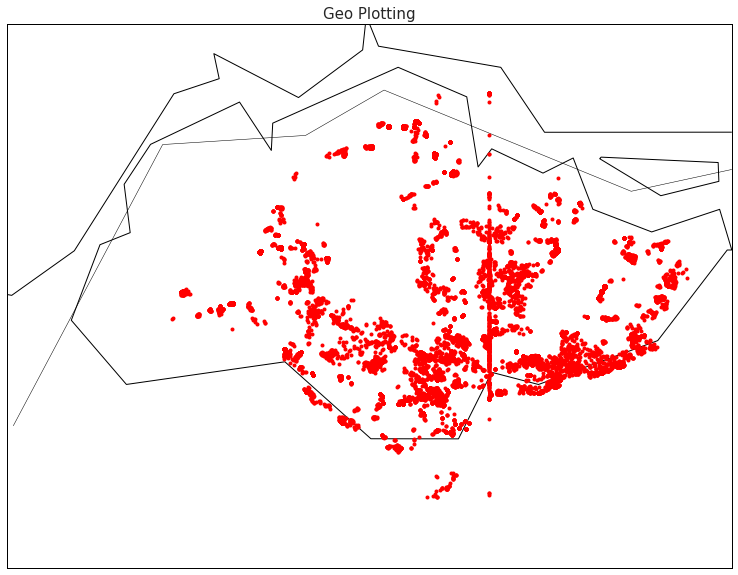

In [129]:
from mpl_toolkits.basemap import Basemap
cols = ['latitude','longitude']
latlong = train_data_pri[cols]

#latlong = latlong.drop(latlong[(latlong.latitude>1.4) & (latlong.latitude<1.6) & (latlong.longitude>103.6) & (latlong.longitude<103.72)].index)
fig = plt.figure(figsize=(20, 10))
#m = Basemap(projection='mill',llcrnrlat=20,urcrnrlat=50,\
                #llcrnrlon=100,urcrnrlon=150,resolution='c')
#m = Basemap(projection='merc',llcrnrlat=1.4,urcrnrlat=1.6,
 #           llcrnrlon=103.6, urcrnrlon=103.72, resolution='i', area_thresh=10, lat_0=1.5, lon_0=103)
m = Basemap(projection='merc',llcrnrlat=1.2,urcrnrlat=1.5,\
            llcrnrlon=103.6, urcrnrlon=104, resolution='i', area_thresh=10, lat_0=1.5, lon_0=103)
 
m.drawcoastlines()
m.drawcountries()
m.drawstates()
#m.fillcontinents(color='#04BAE3',lake_color='#FFFFFF')
m.drawmapboundary(fill_color='#FFFFFF')

lons = latlong['longitude'].values
lats = latlong['latitude'].values
x,y = m(lons, lats)
#x,y=m([103.714098,103.714216],[1.348241,1.347004])

 

# r = red; o = circle marker (see: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)
m.plot(x, y, 'ro', markersize=4)


    
plt.title("Geo Plotting")
plt.show()

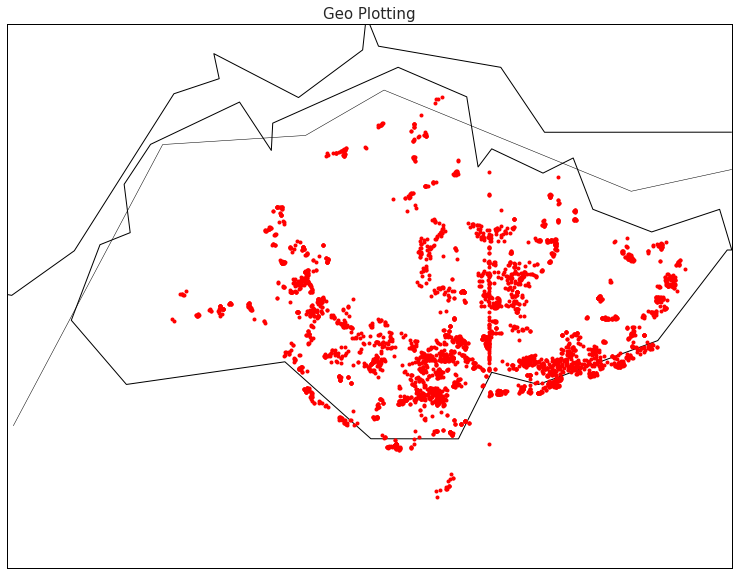

In [130]:
from mpl_toolkits.basemap import Basemap
cols = ['latitude','longitude']
#latlong = train_data_hdb[cols]
fig = plt.figure(figsize=(20, 10))
#m = Basemap(projection='mill',llcrnrlat=20,urcrnrlat=50,\
                #llcrnrlon=100,urcrnrlon=150,resolution='c')
m = Basemap(projection='merc',llcrnrlat=1.2,urcrnrlat=1.5,
            llcrnrlon=103.6, urcrnrlon=104, resolution='i', area_thresh=100, lat_0=1.5, lon_0=103)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
#m.fillcontinents(color='#04BAE3',lake_color='#FFFFFF')
m.drawmapboundary(fill_color='#FFFFFF')

lons = test_data_pri['longitude'].values
lats = test_data_pri['latitude'].values
x,y = m(lons, lats)

# r = red; o = circle marker (see: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)
m.plot(x, y, 'ro', markersize=4)


    
plt.title("Geo Plotting")
plt.show()


 mu = 1526687.78 and sigma = 1489820.23



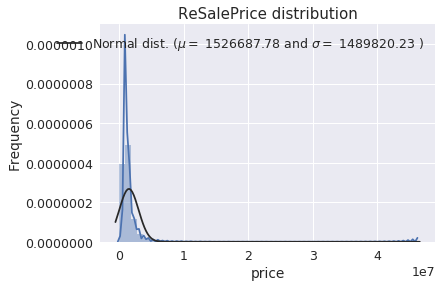

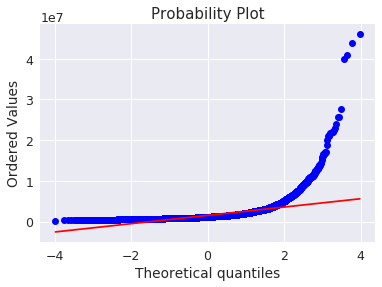

Skewness: 9.101465
Kurtosis: 165.184311


In [131]:
sns.distplot(train_data_pri['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_data_pri['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('ReSalePrice distribution')

fig = plt.figure()
res = stats.probplot(train_data_pri['price'], plot=plt)
plt.show()

print("Skewness: %f" % train_data_pri['price'].skew())
print("Kurtosis: %f" % train_data_pri['price'].kurt())

In [132]:
train_data_pri['price'].describe()

count    1.985100e+04
mean     1.526688e+06
std      1.489858e+06
min      5.000000e+04
25%      8.610000e+05
50%      1.160000e+06
75%      1.649015e+06
max      4.600000e+07
Name: price, dtype: float64

In [133]:
ntrain = train_data_pri.shape[0]
ntest = test_data_pri.shape[0]
y_train = train_data_pri.price.values
all_data = pd.concat((train_data_pri, test_data_pri)).reset_index(drop=True)
all_data.drop(['price'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (23884, 19)


In [134]:
all_data.head()

,address,area,completion_date,contract_date,floor_area_sqm,floor_num,latitude,longitude,month,postal_code,postal_district,postal_sector,project_name,property_type,region,tenure,type_of_land,type_of_sale,unit_num
0,2 Jalan Taman #10-07,Kallang,1997,31-Jan-17,121,10.0,1.325518,103.865503,2017-1,329023,12,32,THE ABERDEEN,Condominium,Central Region,Freehold,Strata,Resale,7.0
1,27 Terrasse Lane #02-36,Hougang,2014,31-Jan-17,132,2.0,1.368569,103.877707,2017-1,544777,19,54,TERRASSE,Condominium,North East Region,99 Yrs From 23/08/2010,Strata,Resale,36.0
2,232 Commonwealth Avenue #20-22,Queenstown,Uncompleted,31-Jan-17,43,20.0,1.295463,103.806516,2017-1,149740,3,14,COMMONWEALTH TOWERS,Condominium,Central Region,99 Yrs From 07/05/2013,Strata,New Sale,22.0
3,105 Hillview Rise #11-25,Bukit Batok,2017,31-Jan-17,154,11.0,1.364813,103.763598,2017-1,667968,23,66,KINGSFORD . HILLVIEW PEAK,Condominium,West Region,99 Yrs From 04/06/2012,Strata,New Sale,25.0
4,61 Cairnhill Circle #05-03,Newton,2015,31-Jan-17,84,5.0,1.308092,103.837863,2017-1,229789,9,22,THE PEAK @ CAIRNHILL II,Apartment,Central Region,Freehold,Strata,Resale,3.0


In [135]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
unit_num,8.989282
floor_num,8.989282


In [136]:
train_missing = (train_data_pri.isnull().sum() / len(train_data_pri)) * 100
train_missing = train_missing.drop(train_missing[train_missing == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :train_missing})
missing_data

,Missing Ratio
unit_num,7.631857
floor_num,7.631857


In [137]:
test_missing = (test_data_pri.isnull().sum() / len(test_data_pri)) * 100
test_missing = test_missing.drop(test_missing[test_missing == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :test_missing})
missing_data

,Missing Ratio
unit_num,15.670717
floor_num,15.670717


In [138]:
train_data_pri[train_data_pri['unit_num'].isnull()]

,project_name,address,floor_area_sqm,type_of_land,price,contract_date,property_type,tenure,completion_date,type_of_sale,postal_district,postal_sector,postal_code,region,area,month,latitude,longitude,floor_num,unit_num
165703,HILLCREST VILLA,3J Hillcrest Road,287,Strata,2830000,31-Jan-17,Terrace House,99 Yrs From 03/08/2006,2009,Resale,11,28,286668,Central Region,Bukit Timah,2017-1,1.328482,103.805241,NaN,NaN
165707,LAKESIDE GROVE,51 Corporation Rise,150,Land,1560000,31-Jan-17,Terrace House,99 Yrs From 12/08/1996,1999,Resale,22,61,618365,West Region,Jurong West,2017-1,1.339417,103.716870,NaN,NaN
165722,SERANGOON GARDEN ESTATE,39 Bridport Avenue,200,Land,2230000,31-Jan-17,Terrace House,999 Yrs From 01/01/1954,Unknown,Resale,19,55,559329,North East Region,Serangoon,2017-1,1.366869,103.864275,NaN,NaN
165763,TERRA VILLAS,19 Jalan Sayang,378,Strata,2640000,26-Jan-17,Terrace House,Freehold,2016,New Sale,14,41,418640,East Region,Bedok,2017-1,1.320803,103.915137,NaN,NaN
165786,CORAL PARK,99 Jalan Pemimpin,339,Land,4138000,26-Jan-17,Semi-Detached House,Freehold,1980,Resale,20,57,577249,Central Region,Bishan,2017-1,1.353973,103.843374,NaN,NaN
165840,BOTANIC @ CLUNY PARK,67 Cluny Park Road,572,Strata,6400000,26-Jan-17,Detached House,Freehold,Uncompleted,New Sale,10,25,257498,Central Region,Tanglin,2017-1,1.320380,103.813558,NaN,NaN
165846,FRANKEL ESTATE,21 Frankel Avenue,575,Land,7200000,26-Jan-17,Detached House,Freehold,1996,Resale,15,45,458149,East Region,Bedok,2017-1,1.317744,103.915759,NaN,NaN
165896,FERNHILL PLACE,8A Fernhill Road,180,Land,4380000,25-Jan-17,Terrace House,Freehold,1996,Resale,10,25,259056,Central Region,Tanglin,2017-1,1.314792,103.825750,NaN,NaN
165900,OPERA ESTATE,21 Dafne Street,120,Land,2235000,24-Jan-17,Terrace House,Freehold,Unknown,Resale,15,45,459541,East Region,Bedok,2017-1,1.320242,103.926541,NaN,NaN
165902,MACPHERSON GARDEN ESTATE,63 Jalan Gembira,92,Land,1720000,24-Jan-17,Terrace House,Freehold,Unknown,Resale,13,36,369153,Central Region,Toa Payoh,2017-1,1.332505,103.880890,NaN,NaN


In [139]:
train_data_pri.floor_num.describe()

count    18336.000000
mean        10.883617
std          8.708739
min          1.000000
25%          4.000000
50%          9.000000
75%         15.000000
max         71.000000
Name: floor_num, dtype: float64

In [140]:
train_data_pri.price.describe()

count    1.985100e+04
mean     1.526688e+06
std      1.489858e+06
min      5.000000e+04
25%      8.610000e+05
50%      1.160000e+06
75%      1.649015e+06
max      4.600000e+07
Name: price, dtype: float64

In [141]:
train_data_pri[train_data_pri['floor_num'].isnull()].price.describe()

count    1.515000e+03
mean     3.642608e+06
std      3.430788e+06
min      5.000000e+04
25%      2.150000e+06
50%      2.800000e+06
75%      3.925000e+06
max      4.600000e+07
Name: price, dtype: float64

In [142]:
train_data_pri[(train_data_pri['price'] > 3400000) & (train_data_pri['price'] < 3700000)].floor_num.describe()

count    64.000000
mean     10.343750
std       9.625064
min       1.000000
25%       3.000000
50%       6.000000
75%      14.000000
max      44.000000
Name: floor_num, dtype: float64

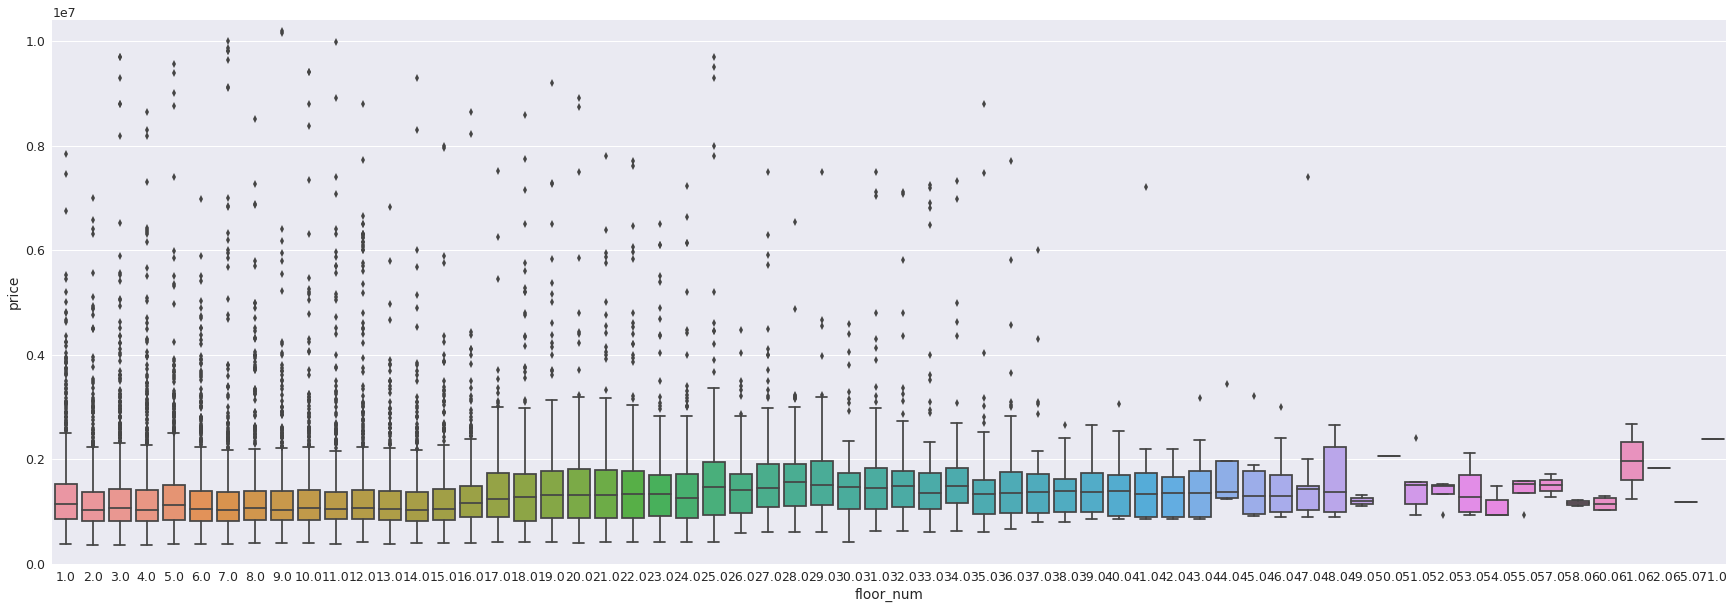

In [143]:
var = 'floor_num'
data = pd.concat([train_data_pri['price'], train_data_pri[var]], axis=1)
f, ax = plt.subplots(figsize=(30, 10))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=10400000);
plt.show()

In [144]:
test_data_pri.floor_num.describe()

count    3401.000000
mean        9.045575
std         8.008414
min         1.000000
25%         4.000000
50%         7.000000
75%        12.000000
max        68.000000
Name: floor_num, dtype: float64

In [145]:
train_data_pri.floor_num = np.where(train_data_pri['floor_num'].isnull(),10,train_data_pri['floor_num'])

In [146]:
print len(train_data_pri.project_name.unique())
print len(test_data_pri.project_name.unique())

1818
1234


In [147]:
train_data_pri.head(10)

,project_name,address,floor_area_sqm,type_of_land,price,contract_date,property_type,tenure,completion_date,type_of_sale,postal_district,postal_sector,postal_code,region,area,month,latitude,longitude,floor_num,unit_num
165681,THE ABERDEEN,2 Jalan Taman #10-07,121,Strata,1370000,31-Jan-17,Condominium,Freehold,1997,Resale,12,32,329023,Central Region,Kallang,2017-1,1.325518,103.865503,10.0,7.0
165682,TERRASSE,27 Terrasse Lane #02-36,132,Strata,1500000,31-Jan-17,Condominium,99 Yrs From 23/08/2010,2014,Resale,19,54,544777,North East Region,Hougang,2017-1,1.368569,103.877707,2.0,36.0
165683,COMMONWEALTH TOWERS,232 Commonwealth Avenue #20-22,43,Strata,808000,31-Jan-17,Condominium,99 Yrs From 07/05/2013,Uncompleted,New Sale,3,14,149740,Central Region,Queenstown,2017-1,1.295463,103.806516,20.0,22.0
165684,KINGSFORD . HILLVIEW PEAK,105 Hillview Rise #11-25,154,Strata,1459040,31-Jan-17,Condominium,99 Yrs From 04/06/2012,2017,New Sale,23,66,667968,West Region,Bukit Batok,2017-1,1.364813,103.763598,11.0,25.0
165685,THE PEAK @ CAIRNHILL II,61 Cairnhill Circle #05-03,84,Strata,2255000,31-Jan-17,Apartment,Freehold,2015,Resale,9,22,229789,Central Region,Newton,2017-1,1.308092,103.837863,5.0,3.0
165686,SOL ACRES,8 Choa Chu Kang Grove #22-20,97,Strata,861000,31-Jan-17,Executive Condominium,99 Yrs From 02/06/2014,Uncompleted,New Sale,23,68,688206,West Region,Choa Chu Kang,2017-1,1.376865,103.750496,22.0,20.0
165687,WOODSVALE,7 Woodlands Drive 72 #08-13,120,Strata,825000,31-Jan-17,Executive Condominium,99 Yrs From 22/09/1997,2000,Resale,25,73,738092,North Region,Woodlands,2017-1,1.444722,103.804951,8.0,13.0
165688,6 DERBYSHIRE,6 Derbyshire Road #16-06,44,Strata,1086654,31-Jan-17,Condominium,Freehold,2017,New Sale,11,30,309462,Central Region,Novena,2017-1,1.315788,103.846041,16.0,6.0
165689,ROBIN SUITES,25 Robin Road #20-02,77,Strata,988888,31-Jan-17,Apartment,Freehold,2016,New Sale,10,25,258203,Central Region,Tanglin,2017-1,1.317668,103.828648,20.0,2.0
165690,BELLEWOODS,114 Woodlands Avenue 5 #04-32,114,Strata,915680,31-Jan-17,Executive Condominium,99 Yrs From 12/08/2013,2017,New Sale,25,73,739017,North Region,Woodlands,2017-1,1.431942,103.801132,4.0,32.0


In [148]:
t = train_data_pri.project_name.unique()
t1 = test_data_pri.project_name.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
name_dict={}
for i in range(len(t)):
    name_dict[t[i]] = i+1
#print block_dict

train_data_pri['project_name'] = train_data_pri.project_name.apply(lambda x : name_dict[x])
test_data_pri['project_name'] = test_data_pri.project_name.apply(lambda x : name_dict[x])

2017 1234
['# 1 LOFT' '# 1 SUITES' '1 KING ALBERT PARK' ..., 'ZEDGE' 'ZENITH'
 'ZEPHYR PARK'] ["D'LEEDON" 'MERGUI MANSIONS' 'MIMOSA PARK' ..., 'PINNACLE 16'
 'BALMORAL POINT' 'STUDIO 3']


In [149]:
print len(train_data_pri.address.unique())
print len(test_data_pri.address.unique())

19738
4033


In [150]:
print train_data_pri.shape
#train_data_pri= train_data_pri.drop(train_data_pri[train_data_pri.address == 'n'].index)
print train_data_pri.shape

(19851, 20)
(19851, 20)


In [151]:
##t = train_data_pri.address.unique()
##t1 = test_data_pri.address.unique()
#t = t + t1
##t = np.append(t,t1)
#t = t.unique()
##t = np.unique(t)
##t.sort()
##print len(t),len(t1)
##print t,t1
##address_dict={}
##for i in range(len(t)):
    ##address_dict[t[i]] = i+1
#print block_dict

##train_data_pri['address'] = train_data_pri.address.apply(lambda x : address_dict[x])
##test_data_pri['address'] = test_data_pri.address.apply(lambda x : address_dict[x])

In [152]:
t = train_data_pri.type_of_land.unique()
t1 = test_data_pri.type_of_land.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
landtype_dict={}
for i in range(len(t)):
    landtype_dict[t[i]] = i+1
#print block_dict

train_data_pri['type_of_land'] = train_data_pri.type_of_land.apply(lambda x : landtype_dict[x])
test_data_pri['type_of_land'] = test_data_pri.type_of_land.apply(lambda x : landtype_dict[x])

2 2
['Land' 'Strata'] ['Strata' 'Land']


In [153]:
train_data_pri.contract_date = train_data_pri.contract_date.apply(lambda x : x.replace("-",""))
test_data_pri.contract_date = test_data_pri.contract_date.apply(lambda x : x.replace("-",""))
print train_data_pri.contract_date.unique()
print test_data_pri.contract_date.unique()

t = train_data_pri.contract_date.unique()
t1 = test_data_pri.contract_date.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
#print t,t1
contract_dict={}
for i in range(len(t)):
    contract_dict[t[i]] = i+1
#print block_dict

train_data_pri['contract_date'] = train_data_pri.contract_date.apply(lambda x : contract_dict[x])
test_data_pri['contract_date'] = test_data_pri.contract_date.apply(lambda x : contract_dict[x])


['31Jan17' '30Jan17' '29Jan17' '28Jan17' '27Jan17' '26Jan17' '25Jan17'
 '24Jan17' '23Jan17' '22Jan17' '21Jan17' '20Jan17' '19Jan17' '18Jan17'
 '17Jan17' '16Jan17' '15Jan17' '14Jan17' '13Jan17' '12Jan17' '11Jan17'
 '10Jan17' '9Jan17' '8Jan17' '7Jan17' '6Jan17' '5Jan17' '4Jan17' '3Jan17'
 '2Jan17' '1Jan17' '28Feb17' '27Feb17' '26Feb17' '25Feb17' '24Feb17'
 '23Feb17' '22Feb17' '21Feb17' '20Feb17' '19Feb17' '18Feb17' '17Feb17'
 '16Feb17' '15Feb17' '14Feb17' '13Feb17' '12Feb17' '11Feb17' '10Feb17'
 '9Feb17' '8Feb17' '7Feb17' '6Feb17' '5Feb17' '4Feb17' '3Feb17' '2Feb17'
 '1Feb17' '31Mar17' '30Mar17' '29Mar17' '28Mar17' '27Mar17' '26Mar17'
 '25Mar17' '24Mar17' '23Mar17' '22Mar17' '21Mar17' '20Mar17' '19Mar17'
 '18Mar17' '17Mar17' '16Mar17' '15Mar17' '14Mar17' '13Mar17' '12Mar17'
 '11Mar17' '10Mar17' '9Mar17' '8Mar17' '7Mar17' '6Mar17' '5Mar17' '4Mar17'
 '3Mar17' '2Mar17' '1Mar17' '30Apr17' '29Apr17' '28Apr17' '27Apr17'
 '26Apr17' '25Apr17' '24Apr17' '23Apr17' '22Apr17' '21Apr17' '20Apr17'
 '1

In [154]:
t = train_data_pri.property_type.unique()
t1 = test_data_pri.property_type.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
proptype_dict={}
for i in range(len(t)):
    proptype_dict[t[i]] = i+1
#print block_dict

train_data_pri['property_type'] = train_data_pri.property_type.apply(lambda x : proptype_dict[x])
test_data_pri['property_type'] = test_data_pri.property_type.apply(lambda x : proptype_dict[x])

6 6
['Apartment' 'Condominium' 'Detached House' 'Executive Condominium'
 'Semi-Detached House' 'Terrace House'] ['Condominium' 'Apartment' 'Terrace House' 'Semi-Detached House'
 'Detached House' 'Executive Condominium']


In [155]:
t = train_data_pri.type_of_sale.unique()
t1 = test_data_pri.type_of_sale.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
typesale_dict={}
for i in range(len(t)):
    typesale_dict[t[i]] = i+1
#print block_dict

train_data_pri['type_of_sale'] = train_data_pri.type_of_sale.apply(lambda x : typesale_dict[x])
test_data_pri['type_of_sale'] = test_data_pri.type_of_sale.apply(lambda x : typesale_dict[x])

3 1
['New Sale' 'Resale' 'Sub Sale'] ['Resale']


In [156]:
train_data_pri.month = train_data_pri.month.apply(lambda x : x.replace("-",""))
test_data_pri.month = test_data_pri.month.apply(lambda x : x.replace("-",""))
print train_data_pri.month.unique()
print test_data_pri.month.unique()

t = train_data_pri.month.unique()
t1 = test_data_pri.month.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
#print t,t1
month_dict={}
for i in range(len(t)):
    month_dict[t[i]] = i+1
#print block_dict

train_data_pri['month'] = train_data_pri.month.apply(lambda x : month_dict[x])
test_data_pri['month'] = test_data_pri.month.apply(lambda x : month_dict[x])

['20171' '20172' '20173' '20174' '20175' '20176' '20177' '20178']
['20179' '201710' '201711']
11 3


In [157]:
def count_remaining_years(row):
    current_year = datetime.today().year
    tenure_years = int(row["tenure_year"])
    tenure_start = row["tenure_start_date"].year
    tenure_end = row["tenure_start_date"].year + tenure_years
    tenure_remain =  tenure_end - current_year
    return tenure_remain

In [158]:
blocks_streets_units = train_data_pri.address.str.split("#")
blocks_streets = blocks_streets_units.str.get(0)
splitted_blocks_streets = blocks_streets.str.split(" ", 1)
blocks = splitted_blocks_streets.str.get(0)
streets = splitted_blocks_streets.str.get(1)
train_data_pri["address_block"] = blocks
train_data_pri["address_street"] = streets 

In [159]:
train_data_pri.address.head(100)

165681                   2 Jalan Taman  #10-07 
165682                27 Terrasse Lane  #02-36 
165683         232 Commonwealth Avenue  #20-22 
165684               105 Hillview Rise  #11-25 
165685             61 Cairnhill Circle  #05-03 
165686           8 Choa Chu Kang Grove  #22-20 
165687            7 Woodlands Drive 72  #08-13 
165688               6 Derbyshire Road  #16-06 
165689                   25 Robin Road  #20-02 
165690          114 Woodlands Avenue 5  #04-32 
165691           4 Choa Chu Kang Grove  #25-09 
165692             180 Westwood Avenue  #06-01 
165693           719 Hougang Avenue 2  #02-327 
165694               103 Hillview Rise  #11-16 
165695               103 Hillview Rise  #11-17 
165696               103 Hillview Rise  #11-19 
165697               103 Hillview Rise  #02-09 
165698         76 Upper Serangoon View  #15-56 
165699                   12 Bedok Rise  #07-43 
165700              101 Woodlands View  #01-01 
165701              152 Canberra Drive  

In [160]:
train_data_pri.address_block.unique()

array(['2', '27', '232', '105', '61', '8', '7', '6', '25', '114', '4',
       '180', '719', '103', '76', '12', '101', '152', '33', '3J', '71',
       '590', '51', '100', '102', '3', '72', '62', '57', '74', '39', '184',
       '355', '70', '55', '230', '52', '85', '19', '80', '89', '26', '41',
       '16', '1001', '13', '21', '987', '308', '23', '228', '28', '134',
       '9B', '99', '201', '68', '79', '10', '967', '19D', '177', '73',
       '18', '15', '17', '825', '526', '1', '93', '5000E', '49', '10A',
       '5', '94', '130', '131', '356', '65', '176', '34', '188', '48A',
       '736', '404', '67', '43', '31', '58', '32', '81', '35', '986', '8D',
       '82', '9', '60', '30', '54', '22', '56', '110', '83', '503', '113',
       '8A', '11', '700', '63', '28A', '323C', '331', '160', '421', '95',
       '98', '240', '770', '396', '126', '77', '935', '45', '120', '8C',
       '136', '14', '75', '138', '244', '28B', '985', '982', '20', '24',
       '991', '142', '2G', '162', '9A', '193', 

In [161]:
train_data_pri.address_street.unique()

array(['Jalan Taman  ', 'Terrasse Lane  ', 'Commonwealth Avenue  ', ...,
       'Sennett Terrace ', 'Sennett Road ', 'Conway Circle '], dtype=object)

In [162]:
blocks_streets_units = test_data_pri.address.str.split("#")
blocks_streets = blocks_streets_units.str.get(0)
splitted_blocks_streets = blocks_streets.str.split(" ", 1)
blocks = splitted_blocks_streets.str.get(0)
streets = splitted_blocks_streets.str.get(1)
test_data_pri["address_block"] = blocks
test_data_pri["address_street"] = streets

In [163]:
test_data_pri.address_street.unique()

array(['Leedon Heights  ', 'Mergui Road  ', 'Mimosa Road  ',
       'Pasir Ris Grove  ', 'River Valley Road  ', 'Serangoon Avenue 3  ',
       'Springside Avenue ', 'Tanjong Rhu Road  ', 'Tavistock Avenue ',
       'Upper Serangoon Crescent  ', 'Woodgrove Drive  ',
       'Balmoral Road  ', 'Bayshore Road  ', 'Bishan Street 25  ',
       'Bukit Timah Road  ', 'Dover Rise  ', 'Duchess Avenue  ',
       'Dunearn Road  ', 'Flora Drive  ', 'Geylang Road  ',
       'Hougang Street 92  ', 'Jalan Krian ', 'Joo Chiat Place ',
       'Keppel Bay Drive  ', 'Kovan Road  ', 'Keppel Bay View  ',
       'Kim Yam Road  ', 'Lorong Marican ', 'Mandalay Road  ',
       'Pasir Ris Link  ', 'Peck Hay Road  ',
       'Ponggol Twenty-Fourth Avenue ', 'Robertson Quay  ',
       'Siglap Road  ', 'Tampines Avenue 1  ', 'Telok Blangah Road  ',
       'Thomson Road  ', 'Trevose Crescent  ', 'Whampoa East ',
       'Woo Mon Chew Road ', 'Amber Gardens  ', 'Amber Road  ',
       'Ang Mo Kio Avenue 8  ', 'Bishan St

In [164]:
train_data_pri['completion_date'] = train_data_pri.completion_date.apply(lambda x : x.split("/")[2] if "/" in x else x )

t = train_data_pri.completion_date.unique()
t1 = test_data_pri.completion_date.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
completion_dict={}
for i in range(len(t)):
    completion_dict[t[i]] = i+1
#print block_dict

train_data_pri['completion_date'] = train_data_pri.completion_date.apply(lambda x : completion_dict[x])
test_data_pri['completion_date'] = test_data_pri.completion_date.apply(lambda x : completion_dict[x])

71 64
['1929' '1932' '1941' '1950' '1951' '1953' '1954' '1955' '1956' '1957'
 '1958' '1960' '1961' '1962' '1963' '1964' '1965' '1966' '1967' '1968'
 '1969' '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978'
 '1979' '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988'
 '1989' '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998'
 '1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008'
 '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017'
 'Uncompleted' 'Unknown'] ['2014' '1995' '1979' '2015' '2016' '1992' '1998' '1986' '2011' '2010'
 '2000' '2012' '2001' '1999' '1968' '2004' '2006' 'Unknown' '2005' '2009'
 '1975' '2013' '1996' '1997' '1991' '1994' '2002' '1982' '2008' '2007'
 '1987' '1978' '1983' '1984' '1972' '1990' '1993' '1971' '2003' '1969'
 '1985' '1989' '2017' '1980' '1976' '1956' '1988' '1967' '1958' '1957'
 '1955' '1977' '1960' '1966' '1965' '1961' '1974' '1953' '1941' '1970'
 '1981' '1950' '1963' '1962']


In [165]:
t = train_data_pri.address_block.unique()
t1 = test_data_pri.address_block.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
address_block_dict={}
for i in range(len(t)):
    address_block_dict[t[i]] = i+1
#print block_dict

train_data_pri['address_block'] = train_data_pri.address_block.apply(lambda x : address_block_dict[x])
test_data_pri['address_block'] = test_data_pri.address_block.apply(lambda x : address_block_dict[x])

974 572
['1' '10' '100' '1001' '1003' '1005' '1007' '101' '102' '102C' '103' '1037'
 '103A' '104' '105' '1055A' '106' '106D' '107' '107A' '107B' '108' '108A'
 '108B' '109' '1091' '10A' '10B' '10C' '10D' '10E' '10F' '10G' '10K' '10N'
 '10R' '11' '110' '110B' '110C' '111' '112' '113' '114' '114A' '114C' '115'
 '115B' '115C' '115J' '116' '116A' '117' '118' '119' '11A' '11B' '11C'
 '11D' '11F' '12' '120' '120A' '121' '121A' '121B' '121F' '121J' '122'
 '122R' '123' '123C' '124' '125' '125D' '126' '127' '127A' '128' '128A'
 '129' '129A' '12A' '12B' '12N' '13' '130' '130A' '131' '131D' '132' '132A'
 '132B' '133' '134' '134A' '134B' '135' '135K' '136' '136A' '136B' '136C'
 '137' '137A' '138' '139' '13A' '13D' '14' '140' '141' '142' '142G' '142H'
 '142J' '143' '144' '145' '146C' '147' '147B' '148' '148H' '149' '14A'
 '14B' '15' '150' '151' '151A' '152' '152K' '153' '154' '154B' '155' '155A'
 '156' '157' '157C' '157D' '157E' '157G' '158' '159' '159A' '15A' '15B/15C'
 '15C' '15D' '15J' '15K' '15N

In [166]:
t = train_data_pri.address_street.unique()
t1 = test_data_pri.address_street.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
address_street_dict={}
for i in range(len(t)):
    address_street_dict[t[i]] = i+1
#print block_dict

train_data_pri['address_street'] = train_data_pri.address_street.apply(lambda x : address_street_dict[x])
test_data_pri['address_street'] = test_data_pri.address_street.apply(lambda x : address_street_dict[x])

1638 965
['Adam Road  ' 'Adis Road  ' 'Ah Hood Road  ' ..., 'Zehnder Road  '
 'Zion Close  ' 'Zion Road  '] ['Leedon Heights  ' 'Mergui Road  ' 'Mimosa Road  ' 'Pasir Ris Grove  '
 'River Valley Road  ' 'Serangoon Avenue 3  ' 'Springside Avenue '
 'Tanjong Rhu Road  ' 'Tavistock Avenue ' 'Upper Serangoon Crescent  '
 'Woodgrove Drive  ' 'Balmoral Road  ' 'Bayshore Road  '
 'Bishan Street 25  ' 'Bukit Timah Road  ' 'Dover Rise  '
 'Duchess Avenue  ' 'Dunearn Road  ' 'Flora Drive  ' 'Geylang Road  '
 'Hougang Street 92  ' 'Jalan Krian ' 'Joo Chiat Place '
 'Keppel Bay Drive  ' 'Kovan Road  ' 'Keppel Bay View  ' 'Kim Yam Road  '
 'Lorong Marican ' 'Mandalay Road  ' 'Pasir Ris Link  ' 'Peck Hay Road  '
 'Ponggol Twenty-Fourth Avenue ' 'Robertson Quay  ' 'Siglap Road  '
 'Tampines Avenue 1  ' 'Telok Blangah Road  ' 'Thomson Road  '
 'Trevose Crescent  ' 'Whampoa East ' 'Woo Mon Chew Road '
 'Amber Gardens  ' 'Amber Road  ' 'Ang Mo Kio Avenue 8  '
 'Bishan Street 15  ' 'Bodmin Drive ' 'Canbe

In [167]:
train_data_pri.tenure = train_data_pri.tenure.str.strip()
train_data_pri.tenure = train_data_pri.tenure.apply(lambda x : x.split(" ")[0] if "Y" in x else x )
train_data_pri.tenure =  train_data_pri.tenure.apply(lambda x : 'Freehold' if x == 'Freehols' else x )

In [168]:
test_data_pri.tenure = test_data_pri.tenure.str.strip()
test_data_pri.tenure = test_data_pri.tenure.apply(lambda x : x.split(" ")[0] if "Y" in x else x )
test_data_pri.tenure =  test_data_pri.tenure.apply(lambda x : 'Freehold' if x == 'Freehols' else x )

In [169]:
train_data_pri.tenure.unique()

array(['Freehold', '99', '103', '999', '947', '956', '60', '946', '100',
       '9999', '101', '998', '70', '102', '929', '89', '945', 'N.A.', '85'], dtype=object)

In [170]:
test_data_pri.tenure.unique()

array(['99', 'Freehold', '999', '103', '956', '946', '9999', '929', '102',
       '85', '947', '998'], dtype=object)

In [171]:
t = train_data_pri.tenure.unique()
t1 = test_data_pri.tenure.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
tenure_dict={}
for i in range(len(t)):
    tenure_dict[t[i]] = i+1
#print block_dict

train_data_pri['tenure'] = train_data_pri.tenure.apply(lambda x : tenure_dict[x])
test_data_pri['tenure'] = test_data_pri.tenure.apply(lambda x : tenure_dict[x])

19 12
['100' '101' '102' '103' '60' '70' '85' '89' '929' '945' '946' '947' '956'
 '99' '998' '999' '9999' 'Freehold' 'N.A.'] ['99' 'Freehold' '999' '103' '956' '946' '9999' '929' '102' '85' '947'
 '998']


In [172]:
t = train_data_pri.area.unique()
t1 = test_data_pri.area.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
area_dict={}
for i in range(len(t)):
    area_dict[t[i]] = i+1
#print block_dict

train_data_pri['area'] = train_data_pri.area.apply(lambda x : area_dict[x])
test_data_pri['area'] = test_data_pri.area.apply(lambda x : area_dict[x])

39 38
['Ang Mo Kio' 'Bedok' 'Bishan' 'Bukit Batok' 'Bukit Merah' 'Bukit Panjang'
 'Bukit Timah' 'Changi  ' 'Choa Chu Kang' 'Clementi' 'Downtown Core'
 'Geylang' 'Hougang' 'Jurong East' 'Jurong West' 'Kallang' 'Mandai'
 'Marine Parade' 'Museum' 'Newton' 'Novena' 'Orchard' 'Outram' 'Pasir Ris'
 'Punggol' 'Queenstown' 'River Valley' 'Rochor' 'Sembawang' 'Sengkang'
 'Serangoon' 'Singapore River' 'Southern Islands' 'Sungei Kadut' 'Tampines'
 'Tanglin' 'Toa Payoh' 'Woodlands' 'Yishun'] ['Bukit Timah' 'Kallang' 'Serangoon' 'Pasir Ris' 'Tanglin' 'Yishun'
 'Hougang' 'Woodlands' 'Bedok' 'Bishan' 'Queenstown' 'Geylang'
 'Bukit Merah' 'River Valley' 'Novena' 'Newton' 'Punggol' 'Singapore River'
 'Tampines' 'Marine Parade' 'Ang Mo Kio' 'Choa Chu Kang' 'Bukit Batok'
 'Museum' 'Sembawang' 'Downtown Core' 'Jurong East' 'Toa Payoh' 'Rochor'
 'Southern Islands' 'Bukit Panjang' 'Sengkang' 'Clementi' 'Jurong West'
 'Outram' 'Orchard' 'Mandai' 'Changi  ']


In [173]:
t = train_data_pri.postal_code.unique()
t1 = test_data_pri.postal_code.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
postal_dict={}
for i in range(len(t)):
    postal_dict[t[i]] = i+1
#print block_dict

train_data_pri['postal_code'] = train_data_pri.postal_code.apply(lambda x : postal_dict[x])
test_data_pri['postal_code'] = test_data_pri.postal_code.apply(lambda x : postal_dict[x])

5878 2516
[ 18965  18978  18980 ..., 829488 829676 829697] [267955 219057 808005 ..., 248196 545040 588996]


In [174]:
t = train_data_pri.region.unique()
t1 = test_data_pri.region.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
region_dict={}
for i in range(len(t)):
    region_dict[t[i]] = i+1
#print block_dict

train_data_pri['region'] = train_data_pri.region.apply(lambda x : region_dict[x])
test_data_pri['region'] = test_data_pri.region.apply(lambda x : region_dict[x])

5 5
['Central Region' 'East Region' 'North East Region' 'North Region'
 'West Region'] ['Central Region' 'North East Region' 'East Region' 'North Region'
 'West Region']


In [175]:
t = train_data_pri.latitude.unique()
t1 = test_data_pri.latitude.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
lat_dict={}
for i in range(len(t)):
    lat_dict[t[i]] = i+1
#print block_dict

train_data_pri['latitude'] = train_data_pri.latitude.apply(lambda x : lat_dict[x])
test_data_pri['latitude'] = test_data_pri.latitude.apply(lambda x : lat_dict[x])

6967 2423
[ 1.23922338  1.23922338  1.23931469 ...,  1.46205263  1.46206902
  1.46210218] [ 1.31621028  1.31717013  1.3833584  ...,  1.29571275  1.38021727
  1.33863165]


In [176]:
t = train_data_pri.longitude.unique()
t1 = test_data_pri.longitude.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
long_dict={}
for i in range(len(t)):
    long_dict[t[i]] = i+1
#print block_dict

train_data_pri['longitude'] = train_data_pri.longitude.apply(lambda x : long_dict[x])
test_data_pri['longitude'] = test_data_pri.longitude.apply(lambda x : long_dict[x])

6371 2343
[ 103.6908931   103.6911401   103.6913589  ...,  103.97392068  103.9747604
  103.9755353 ] [ 103.80438833  103.85168183  103.86245702 ...,  103.8275808   103.89985746
  103.77858543]


In [177]:
train_data_pri.head()

,project_name,address,floor_area_sqm,type_of_land,price,contract_date,property_type,tenure,completion_date,type_of_sale,...,postal_code,region,area,month,latitude,longitude,floor_num,unit_num,address_block,address_street
165681,1532,2 Jalan Taman #10-07,121,2,1370000,270,2,18,49,2,...,1624,1,16,1,3257,3583,10.0,7.0,241,707
165682,1529,27 Terrasse Lane #02-36,132,2,1500000,270,2,14,66,2,...,3825,3,13,1,5539,3972,2.0,36.0,354,1487
165683,331,232 Commonwealth Avenue #20-22,43,2,808000,270,2,14,70,1,...,374,1,26,1,548,1492,20.0,22.0,288,228
165684,782,105 Hillview Rise #11-25,154,2,1459040,270,2,14,69,1,...,4931,5,4,1,5386,476,11.0,25.0,15,464
165685,1718,61 Cairnhill Circle #05-03,84,2,2255000,270,1,18,67,2,...,608,1,20,1,1237,2608,5.0,3.0,767,143


In [178]:
test_data_pri.head()

,project_name,address,floor_area_sqm,type_of_land,contract_date,property_type,tenure,completion_date,type_of_sale,postal_district,...,postal_code,region,area,month,latitude,longitude,floor_num,unit_num,address_block,address_street
0,379,11 Leedon Heights #06-31,92,2,251,2,14,66,2,10,...,1130,1,7,11,2323,1409,6.0,31.0,37,835
1,937,81 Mergui Road #03-02,129,2,251,1,18,47,2,8,...,495,1,16,11,2439,3248,3.0,2.0,864,1031
2,946,43 Mimosa Road #03-49,176,2,251,2,18,31,2,28,...,5757,3,31,11,6213,3457,3.0,49.0,587,1047
3,1709,115 Pasir Ris Grove #03-42,46,2,251,2,14,67,2,18,...,3300,2,24,11,5613,5898,3.0,42.0,47,1157
4,1278,469 River Valley Road #07-30,120,2,251,2,16,67,2,10,...,770,1,36,11,491,2059,7.0,30.0,620,1252


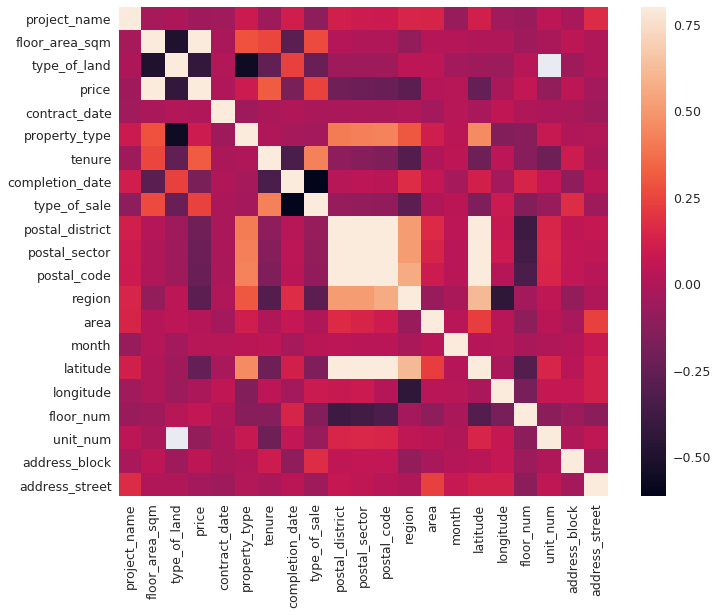

In [179]:
corrmat = train_data_pri.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

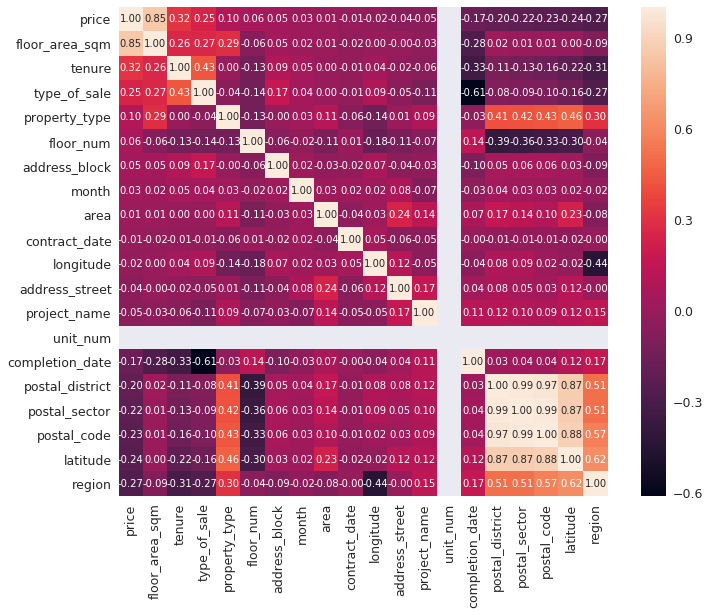

In [180]:
cols = corrmat.nlargest(20, 'price')['price'].index
cm = np.corrcoef(train_data_pri[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [181]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,price
1,floor_area_sqm
2,tenure
3,type_of_sale
4,property_type
5,floor_num
6,address_block
7,month
8,area
9,contract_date


In [182]:
train_data_pri = train_data_pri.drop(['unit_num'],axis=1)
train_data_pri = train_data_pri.drop(['address'],axis=1)
train_data_pri = train_data_pri.drop(['project_name'],axis=1)
train_data_pri = train_data_pri.drop(['contract_date'],axis=1)
train_data_pri.head()

,floor_area_sqm,type_of_land,price,property_type,tenure,completion_date,type_of_sale,postal_district,postal_sector,postal_code,region,area,month,latitude,longitude,floor_num,address_block,address_street
165681,121,2,1370000,2,18,49,2,12,32,1624,1,16,1,3257,3583,10.0,241,707
165682,132,2,1500000,2,14,66,2,19,54,3825,3,13,1,5539,3972,2.0,354,1487
165683,43,2,808000,2,14,70,1,3,14,374,1,26,1,548,1492,20.0,288,228
165684,154,2,1459040,2,14,69,1,23,66,4931,5,4,1,5386,476,11.0,15,464
165685,84,2,2255000,1,18,67,2,9,22,608,1,20,1,1237,2608,5.0,767,143


In [183]:
trainY = train_data_pri.price.values
print trainY
train_data_pri = train_data_pri.drop(['price'],axis=1)
train_data_pri.head()

[1370000 1500000  808000 ...,  790000 1760000  733000]


,floor_area_sqm,type_of_land,property_type,tenure,completion_date,type_of_sale,postal_district,postal_sector,postal_code,region,area,month,latitude,longitude,floor_num,address_block,address_street
165681,121,2,2,18,49,2,12,32,1624,1,16,1,3257,3583,10.0,241,707
165682,132,2,2,14,66,2,19,54,3825,3,13,1,5539,3972,2.0,354,1487
165683,43,2,2,14,70,1,3,14,374,1,26,1,548,1492,20.0,288,228
165684,154,2,2,14,69,1,23,66,4931,5,4,1,5386,476,11.0,15,464
165685,84,2,1,18,67,2,9,22,608,1,20,1,1237,2608,5.0,767,143


In [184]:
train_data_pri.shape

(19851, 17)

In [185]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [186]:
np.random.seed(13)
test_size = .1
X_train, X_test, y_train, y_test = train_test_split(train_data_pri, trainY, test_size = test_size)
print X_train.shape, y_train.shape, X_test.shape, y_test.shape

(17865, 17) (17865,) (1986, 17) (1986,)


In [194]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=15, 
                             min_child_weight=1.5, n_estimators=1000,
                             reg_alpha=0.8, reg_lambda=0.7,
                             subsample=0.2, silent=1,
                             random_state =13)

In [195]:
n_folds = 10
kf = KFold(n_folds, shuffle=True, random_state=13).get_n_splits(X_train.values)
map_metrics= -cross_val_score(model_xgb, X_train.values, y_train, scoring="neg_mean_absolute_error", cv = kf)
#rmse= np.sqrt(-cross_val_score(model_xgb, train_data_hdb.values, trainY, scoring="neg_mean_squared_error", cv = kf))
print map_metrics


[ 157013.47899762  147898.80411479  170388.629162    153808.03037563
  174132.29821279  150323.86380179  151980.37926932  161814.41254899
  136816.24517952  149086.49039404]


In [196]:
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0.0, learning_rate=0.05,
       max_delta_step=0, max_depth=15, min_child_weight=1.5, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=13, reg_alpha=0.8, reg_lambda=0.7, scale_pos_weight=1,
       seed=None, silent=1, subsample=0.2)

In [197]:
pred_train = model_xgb.predict(X_train)

In [198]:
np.mean(np.abs((y_train - pred_train) / y_train)) * 100

3.1915957781622395

In [199]:
pred_test = model_xgb.predict(X_test)

In [200]:
np.mean(np.abs((y_test - pred_test) / y_test)) * 100

8.7317250989589734

In [201]:
GBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05,
                                   max_depth=10, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [202]:
def mse_cv(model):
    kfold = KFold(10, shuffle=True, random_state=13).get_n_splits(X_train.values)
    metrics= -cross_val_score(model, X_train.values, y_train, scoring="neg_mean_absolute_error", cv = kfold)
    return(metrics)

In [203]:
print("GBoost",mse_cv(GBoost))

('GBoost', array([  93064.06621852,   88748.01177338,   97193.54019262,
         99394.32234336,  105198.64194247,   98716.41635595,
         92989.02833095,  109631.75371424,   81444.01348046,
        101771.51564525]))


In [204]:
GBoost.fit(X_train,y_train)
pred_Gboost = GBoost.predict(X_train)
np.mean(np.abs((y_train - pred_Gboost) / y_train)) * 100

2.0036088998048065

In [206]:
pred_test_gboost = GBoost.predict(X_test)
np.mean(np.abs((y_test - pred_test_gboost) / y_test)) * 100

5.0915049385905604

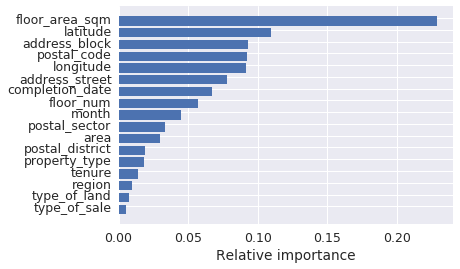

In [207]:
indices = np.argsort(GBoost.feature_importances_)

# plot as bar chart
names=list(X_train)
plt.barh(np.arange(len(names)), GBoost.feature_importances_[indices])

plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])

_ = plt.xlabel('Relative importance')

In [210]:
test_data_pri = test_data_pri.drop(['unit_num'],axis=1)
test_data_pri = test_data_pri.drop(['address'],axis=1)
test_data_pri = test_data_pri.drop(['project_name'],axis=1)
test_data_pri = test_data_pri.drop(['contract_date'],axis=1)
test_data_pri.head()

,floor_area_sqm,type_of_land,property_type,tenure,completion_date,type_of_sale,postal_district,postal_sector,postal_code,region,area,month,latitude,longitude,floor_num,address_block,address_street
0,92,2,2,14,66,2,10,26,1130,1,7,11,2323,1409,6.0,37,835
1,129,2,1,18,47,2,8,21,495,1,16,11,2439,3248,3.0,864,1031
2,176,2,2,18,31,2,28,80,5757,3,31,11,6213,3457,3.0,587,1047
3,46,2,2,14,67,2,18,51,3300,2,24,11,5613,5898,3.0,47,1157
4,120,2,2,16,67,2,10,24,770,1,36,11,491,2059,7.0,620,1252


In [209]:
train_data_pri.head()

,floor_area_sqm,type_of_land,property_type,tenure,completion_date,type_of_sale,postal_district,postal_sector,postal_code,region,area,month,latitude,longitude,floor_num,address_block,address_street
165681,121,2,2,18,49,2,12,32,1624,1,16,1,3257,3583,10.0,241,707
165682,132,2,2,14,66,2,19,54,3825,3,13,1,5539,3972,2.0,354,1487
165683,43,2,2,14,70,1,3,14,374,1,26,1,548,1492,20.0,288,228
165684,154,2,2,14,69,1,23,66,4931,5,4,1,5386,476,11.0,15,464
165685,84,2,1,18,67,2,9,22,608,1,20,1,1237,2608,5.0,767,143


In [212]:
test_data_pri.floor_num = np.where(test_data_pri['floor_num'].isnull(),10,test_data_pri['floor_num'])

In [213]:
test_y_gboost = GBoost.predict(test_data_pri)
print test_y_gboost

[ 1470346.06098816  1257959.05930651  1488218.0964348  ...,
  1616628.94359106  1314693.13597875  1381413.30400866]


In [222]:
test_temp = pd.read_csv('./data/private_test.csv')
idx = test_temp['index']
print idx

0       3766
1       3767
2       3768
3       3769
4       3770
5       3771
6       3772
7       3773
8       3774
9       3775
10      3776
11      3777
12      3778
13      3779
14      3780
15      3781
16      3782
17      3783
18      3784
19      3785
20      3786
21      3787
22      3788
23      3789
24      3790
25      3791
26      3792
27      3793
28      3794
29      3795
        ... 
4003    7769
4004    7770
4005    7771
4006    7772
4007    7773
4008    7774
4009    7775
4010    7776
4011    7777
4012    7778
4013    7779
4014    7780
4015    7781
4016    7782
4017    7783
4018    7784
4019    7785
4020    7786
4021    7787
4022    7788
4023    7789
4024    7790
4025    7791
4026    7792
4027    7793
4028    7794
4029    7795
4030    7796
4031    7797
4032    7798
Name: index, Length: 4033, dtype: int64


In [244]:
sub_1 = pd.Series(test_y_gboost, name='price')
sub_1 = sub_1.to_frame()
sub_1 = pd.concat([idx, sub_1], axis=1)
#sub_1.index.name = 'index'
#sub_1.index = idx
#sub_1 = pd.concat([idx, test_y_gboost], axis=1)
#sub_1.to_csv("./data/submission-private-1.csv", header=['price'])

In [245]:
print sub_1

      index         price
0      3766  1.470346e+06
1      3767  1.257959e+06
2      3768  1.488218e+06
3      3769  6.249760e+05
4      3770  2.372074e+06
5      3771  9.306403e+05
6      3772  2.933537e+06
7      3773  3.314041e+06
8      3774  3.135903e+06
9      3775  1.299109e+06
10     3776  7.375361e+05
11     3777  3.131416e+06
12     3778  8.241482e+05
13     3779  1.577107e+06
14     3780  2.193565e+06
15     3781  1.341166e+06
16     3782  2.397419e+06
17     3783  2.643424e+06
18     3784  1.213004e+06
19     3785  1.042607e+06
20     3786  7.801265e+05
21     3787  7.943738e+05
22     3788  3.146984e+06
23     3789  2.224235e+06
24     3790  2.576959e+06
25     3791  1.778732e+06
26     3792  1.416882e+06
27     3793  2.704131e+06
28     3794  1.771154e+06
29     3795  1.998866e+06
...     ...           ...
4003   7769  1.826301e+06
4004   7770  1.341438e+06
4005   7771  1.329663e+06
4006   7772  2.151924e+06
4007   7773  3.096917e+06
4008   7774  2.760973e+06
4009   7775 

In [246]:
sub_1.to_csv('private_predicted_1.csv',index=False)

In [247]:
s1 = pd.read_csv('./data/submission-6.csv')
print s1

      index          price
0         0  307715.361531
1         1  433027.139036
2         2  296125.566168
3         3  278279.132791
4         4  285354.820888
5         5  284809.619046
6         6  316949.733721
7         7  266504.482615
8         8  316254.934603
9         9  293109.342385
10       10  266338.101221
11       11  283082.177274
12       12  297800.886782
13       13  263643.926003
14       14  266651.022422
15       15  370487.196279
16       16  335348.820472
17       17  284756.347001
18       18  281621.129113
19       19  331842.011241
20       20  403164.467788
21       21  361605.197078
22       22  286014.477006
23       23  345252.208957
24       24  297387.259477
25       25  280689.530968
26       26  415815.970492
27       27  320763.261696
28       28  271147.145991
29       29  315430.535680
...     ...            ...
3736   3736  311270.171070
3737   3737  389579.445864
3738   3738  312180.805964
3739   3739  375854.016643
3740   3740  317613.608744
3

In [249]:
s2 = pd.read_csv('private_predicted_1.csv')
print s2

      index         price
0      3766  1.470346e+06
1      3767  1.257959e+06
2      3768  1.488218e+06
3      3769  6.249760e+05
4      3770  2.372074e+06
5      3771  9.306403e+05
6      3772  2.933537e+06
7      3773  3.314041e+06
8      3774  3.135903e+06
9      3775  1.299109e+06
10     3776  7.375361e+05
11     3777  3.131416e+06
12     3778  8.241482e+05
13     3779  1.577107e+06
14     3780  2.193565e+06
15     3781  1.341166e+06
16     3782  2.397419e+06
17     3783  2.643424e+06
18     3784  1.213004e+06
19     3785  1.042607e+06
20     3786  7.801265e+05
21     3787  7.943738e+05
22     3788  3.146984e+06
23     3789  2.224235e+06
24     3790  2.576959e+06
25     3791  1.778732e+06
26     3792  1.416882e+06
27     3793  2.704131e+06
28     3794  1.771154e+06
29     3795  1.998866e+06
...     ...           ...
4003   7769  1.826301e+06
4004   7770  1.341438e+06
4005   7771  1.329663e+06
4006   7772  2.151924e+06
4007   7773  3.096917e+06
4008   7774  2.760973e+06
4009   7775 

In [250]:
#s3 = s2[['index','price']]
#print s3

In [251]:
final = pd.concat([s1,s2])
print final

      index         price
0         0  3.077154e+05
1         1  4.330271e+05
2         2  2.961256e+05
3         3  2.782791e+05
4         4  2.853548e+05
5         5  2.848096e+05
6         6  3.169497e+05
7         7  2.665045e+05
8         8  3.162549e+05
9         9  2.931093e+05
10       10  2.663381e+05
11       11  2.830822e+05
12       12  2.978009e+05
13       13  2.636439e+05
14       14  2.666510e+05
15       15  3.704872e+05
16       16  3.353488e+05
17       17  2.847563e+05
18       18  2.816211e+05
19       19  3.318420e+05
20       20  4.031645e+05
21       21  3.616052e+05
22       22  2.860145e+05
23       23  3.452522e+05
24       24  2.973873e+05
25       25  2.806895e+05
26       26  4.158160e+05
27       27  3.207633e+05
28       28  2.711471e+05
29       29  3.154305e+05
...     ...           ...
4003   7769  1.826301e+06
4004   7770  1.341438e+06
4005   7771  1.329663e+06
4006   7772  2.151924e+06
4007   7773  3.096917e+06
4008   7774  2.760973e+06
4009   7775 

In [252]:
final.to_csv('final_predicted_1.csv',index=False)